# Exemplary workflow of CIDER

ChemIcal DatasEt comparatoR (CIDER) primarily utilizes RDKit to compare two or more chemical structure datasets (SD files) in different aspects, e.g. size, overlap, molecular descriptor distributions, chemical space clustering, etc., most of which can be visually inspected.  
This notebook is an example of how you can use CIDER and what the different parameters of the functions do.  
For more details on the individual methods and their handling, please refer to the documentation.

## Setup  
The first step when using CIDER is to import CIDER and define a suitable name for calling.

In [39]:
from ChemIcal-DatasEt-comparatoR.CIDER import ChemicalDatasetComparator
cider = ChemicalDatasetComparator()

2023-06-19 10:58:51,026 [ERROR] CIDER: An Error occured while executing CIDER!
Traceback (most recent call last):
  File "/home/kohulan/anaconda3/envs/cider_chem/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3238, in run_cell_async
    code_ast = compiler.ast_parse(cell, filename=cell_name)
  File "/home/kohulan/anaconda3/envs/cider_chem/lib/python3.10/site-packages/IPython/core/compilerop.py", line 86, in ast_parse
    return compile(source, filename, symbol, self.flags | PyCF_ONLY_AST, 1)
  File "/tmp/ipykernel_255387/1268718004.py", line 1
    from ChemIcal-DatasEt-comparatoR.CIDER import ChemicalDatasetComparator
                 ^
SyntaxError: invalid syntax


SyntaxError: invalid syntax (1268718004.py, line 1)

## Class variables  
In CIDER there are some class variables that determine the names of the keys generated by the methods. Those keys are important to know for calling the values for inspection and after running a method CIDER will tell the name of the created keys.  
The class variables have predefined values but can be changed. Following are the class variables with their predefined values and the function that generates the key.

In [2]:
cider.import_keyname = "SDMolSupplier_Object" # cider.import_as_data_dict: 

cider.dataset_length_keyname = "number_of_molecules" # cider.get_number_of_molecules

cider.database_id_keyname = "coconut_id" # cider.get_database_id

cider.identifier_keyname = "identifier_list" # cider.get_identifier_list_key

cider.duplicates_keyname = "number_of_duplicates" # cider.get_duplicate_key
cider.duplicates_id_keyname = "duplicates_id" # cider.get_duplicate_key
cider.duplicates_index_keyname = "duplicates_index" # cider.get_duplicate_key

cider.shared_mols_keyname = "number_of_shared_molecules" # cider.get_shared_molecules_key
cider.shared_mols_id_keyname = "shared_molecules" # cider.get_shared_molecules_key

cider.lipinski_list_keyname = "number_of_broken_Lipinski_Rules" # cider.get_lipinski_key
cider.lipinski_summary_keyname = "Lipinski_Rule_of_5_summary" # cider.get_lipinski_key

cider.scaffold_list_keyname = "scaffold_list" # cider.draw_most_frequent_scaffolds
cider.scaffold_summary_keyname = "scaffold_summary" # cider.draw_most_frequent_scaffolds

## Data import  and inspection
The second step is to choose the datasets you want to compare and import them as SDFiles. Here an three exemplary datasets are used. The phenole and the chlorbenzene set each contain the first 100 search hits from the COCONUT database for the query phenole or chlorbenzene respectively. The chlorbenzene-5 set contains half of the molecules from the chlorbenzene set.    
When using the import function, there will be a dictionary created which content will be updated with every subsequent function used. This main dictionary contains a sub-dictionary for every SDFile named after the SDFile name.  
When importing the SDFiles very molecule in the files will be parsed once to check for faulty molecules or molecules that cannot be parsed. Faulty molecules will be deleted from the working SDMolSupplier Objects and there index will be given. They will remain in the original SDFiles and with the given index those molecules can be checked in the original file.

In [3]:
testdict = cider.import_as_data_dict('data')

2023-06-19 10:53:06,274 [INFO] CIDER: No faulty molecules found in set_phenole.sdf
2023-06-19 10:53:06,284 [INFO] CIDER: No faulty molecules found in set_chlorbenzene-5.sdf
2023-06-19 10:53:06,296 [INFO] CIDER: No faulty molecules found in set_chlorbenzene.sdf
2023-06-19 10:53:06,297 [INFO] CIDER: Created dictionary with keys: ['set_phenole.sdf', 'set_chlorbenzene-5.sdf', 'set_chlorbenzene.sdf', 'figures']
2023-06-19 10:53:06,300 [WARNING] CIDER: Already existing output folder with files! Old data will be overwritten!


The main dictionary contains the names of the SDFiles as keys.  
The sub-dictionaries should always have the same keys, but the values of those keys are different. As here shown, all sub-dictionaries have the 'SDMolSupplier_Object' key. The values for this key are the imported SDFiles.

In [4]:
testdict

{'set_phenole.sdf': {'SDMolSupplier_Object': <rdkit.Chem.rdmolfiles.SDMolSupplier at 0x7f3669f14e50>},
 'set_chlorbenzene-5.sdf': {'SDMolSupplier_Object': <rdkit.Chem.rdmolfiles.SDMolSupplier at 0x7f3669f14090>},
 'set_chlorbenzene.sdf': {'SDMolSupplier_Object': <rdkit.Chem.rdmolfiles.SDMolSupplier at 0x7f3669f15170>},
 'figures': {}}

Additionally to the SDFile keys there is the key 'figures' in the main dictionary. In this sub-dictionary all plots and images that are created will be stored.

## Overview dataset size  
To get an overview of the size of the datasets, the number of molecules in every dataset can be determined.  
The number will be displayed in line and will also be included as a new key in every sub-dictionary called 'number_of_molecules'.

In [5]:
cider.get_number_of_molecules(testdict)

2023-06-19 10:53:07,810 [INFO] CIDER: Number of molecules in set_phenole.sdf: 100
2023-06-19 10:53:07,812 [INFO] CIDER: Number of molecules in set_chlorbenzene-5.sdf: 50
2023-06-19 10:53:07,813 [INFO] CIDER: Number of molecules in set_chlorbenzene.sdf: 100
2023-06-19 10:53:07,814 [INFO] CIDER: Updated dictionary with 'number_of_molecules'


Now all the sub-dictionaries are updated with the key 'number_of_molecules' and the number of molecules can be accessed by this new key.

In [6]:
first_subdict = list(testdict.keys())[0]
print(testdict[first_subdict].keys())
print('Number of molecules in the first set: ' + str(testdict[first_subdict]['number_of_molecules']))

dict_keys(['SDMolSupplier_Object', 'number_of_molecules'])
Number of molecules in the first set: 100


## Overview molecules (visualization of molecules)  
To get a visual overview over the molecules in the different datasets, a part of the molecules can be plotted in a grid image.  
The number of plotted molecules and the number of molecules in one row can be specified, as well as the image size (with regard to the single molecule image). Here the first 20 molecules are displayed.  
The image will be displayed in line and exported to the output folder. CIDER creates the output folder itself in the same directory where the original data is stored.

2023-06-19 10:53:09,579 [INFO] CIDER: Updated dictionary with 'mol_grid'


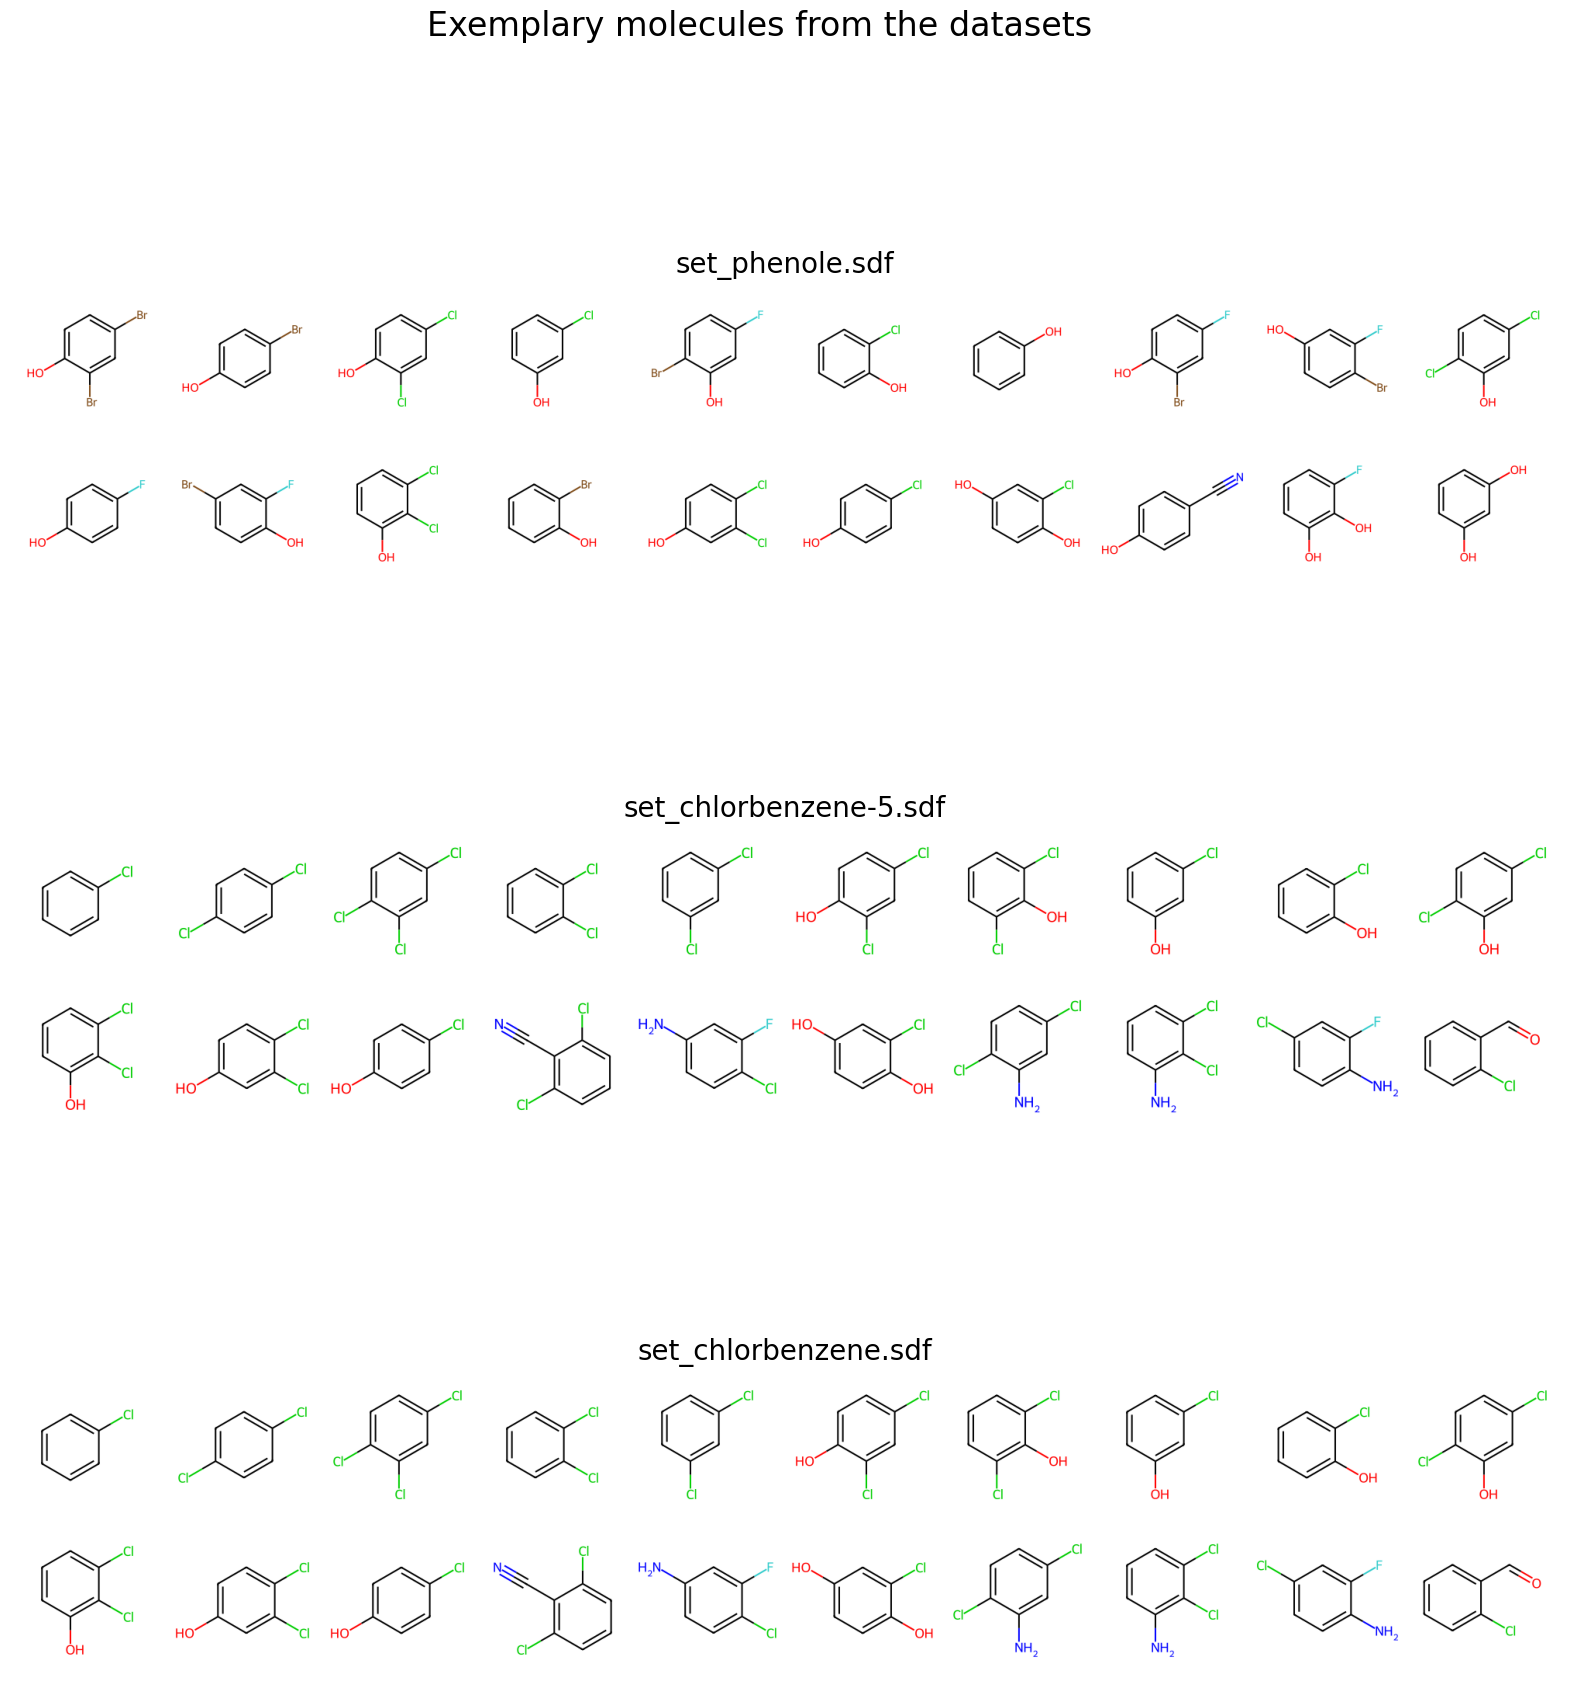

In [7]:
cider.draw_molecules(testdict, number_of_mols = 20, mols_per_row = 10)

## Get  Database ID  
When working with SDFiles exported from a database, it could be helpful to add the database ID for every molecule to the dictionary. For doing so, it is necessary to know how the ID is named in the SDFiles.

In [8]:
cider.get_database_id(testdict, 'coconut_id')


2023-06-19 10:53:10,059 [INFO] CIDER: Updated dictionary with 'coconut_id'


Again, after running the function all the sub-dictionaries are updated with a new key 'coconut_id' and can be accessed with this. When there is no database ID found there will be None in the list.   
(Remember: If not using the COCONUT database ID, the key name (a class variable) can be changed according to the database ID used.)

In [9]:
print(testdict[first_subdict].keys())
print('First COCONUT IDs for first set: ' + str(testdict[first_subdict]['coconut_id'][:5]))

dict_keys(['SDMolSupplier_Object', 'number_of_molecules', 'coconut_id'])
First COCONUT IDs for first set: ['CNP0216116', 'CNP0085593', 'CNP0401033', 'CNP0109649', 'CNP0088749']


## Get Chemical Identifier  
For the subsequent comparison, the molecules need a string representation as a chemical identifier. SMILES, InChI or InChIKey strings can be used here.  
Please note that a lot of methods from CIDER cannot be used if the chemical identifiers are missing. So remember to run the 'get_identifier_list_key' method before calling for any other comparison methods.

In [10]:
cider.get_identifier_list_key(testdict, 'smiles')

2023-06-19 10:53:10,152 [INFO] CIDER: Updated dictionary with 'identifier_list'


As before all sub-dictionaries are now containing the new key 'identifier_list' and those lists can be accessed. 

In [11]:
print(testdict[first_subdict].keys())
print('First SMILES strings for first set: ' + str(testdict[first_subdict]['identifier_list'][:5]))

dict_keys(['SDMolSupplier_Object', 'number_of_molecules', 'coconut_id', 'identifier_list'])
First SMILES strings for first set: ['Oc1ccc(Br)cc1Br', 'Oc1ccc(Br)cc1', 'Oc1ccc(Cl)cc1Cl', 'Oc1cccc(Cl)c1', 'Oc1cc(F)ccc1Br']


## Testing for duplicates  
Before further comparison between the datasets, it might be important to know if or rather how many and which duplicates in a single dataset. The duplicates are noted through their string identifier and their index number in the MolSupplier Object.
(Short reminder: This method cannot be used unless the 'get_identifier_list_key' method is run previously!)

In [12]:
cider.get_duplicate_key(testdict)

2023-06-19 10:53:10,500 [INFO] CIDER: Number of duplicates in set_phenole.sdf: 2, duplicate identifier(s): {'O=Cc1ccccc1O', 'O=Cc1ccc(O)cc1'}, duplicate index: [[46, 47], [43, 44]]
2023-06-19 10:53:10,502 [INFO] CIDER: Number of duplicates in set_chlorbenzene-5.sdf: 0, duplicate identifier(s): set(), duplicate index: []
2023-06-19 10:53:10,503 [INFO] CIDER: Number of duplicates in set_chlorbenzene.sdf: 0, duplicate identifier(s): set(), duplicate index: []
2023-06-19 10:53:10,504 [INFO] CIDER: Updated dictionary with 'number_of_duplicates', 'duplicates_id' and 'duplicates_index'


In the established way the new keys in the sub-dictionaries can be accessed.

In [13]:
print('There are ' + str(testdict[first_subdict]['number_of_duplicates']) + ' duplicates in the first set.')

There are 2 duplicates in the first set.


With the given indices the entries for the duplicates can be further checked out, e.g. their database ID can be retrieved. The exemplary datasets here the identified duplicates are extracted from outdated subsets from the COCONUT database and have been merged into unique records in the meantime.

In [14]:
try:
    print('There are ' + str(testdict['set_phenole.sdf']['number_of_duplicates']) + ' duplicates in the first set.')
    print('SMILES strings for the duplicates: ' + str(testdict['set_phenole.sdf']['duplicates_id']) )
    print('Index for the duplicates: ' + str(testdict['set_phenole.sdf']['duplicates_index']))
    print('COCONUT ID for the first duplicates: ' + str(testdict['set_phenole.sdf']['coconut_id'][43]),  str(testdict['set_phenole.sdf']['coconut_id'][44]))
except ValueError:
    print('Not the exemplary data')

There are 2 duplicates in the first set.
SMILES strings for the duplicates: {'O=Cc1ccccc1O', 'O=Cc1ccc(O)cc1'}
Index for the duplicates: [[46, 47], [43, 44]]
COCONUT ID for the first duplicates: CNP0076387 CNP0230702


## Comparison of molecules and visualization  
There might be molecules that are present in all the compared datasets. The number of these molecules and their identifier string can be extracted.  
Additionally, this intersection between the datasets can be visualized in a Venn diagram. The image will be displayed in line, and it will also be exported to the output folder. As mentioned before the chlorbenzene-5 set contains only molecules from the bigger chlorbenzene set and therefore there is a complete overlap between these two.  
If there is only one dataset the calculation of the shared molecules will cause an error. The visualization as Venn diagram also works only for two or three datasets and will throw an error otherwise.  
(Duplicate molecules will not be counted twice for the comparison and they will also not displayed in the Venn diagram. This might lead to a different number of molecules in the Venn diagram in comparison 'number_of_mols' key.)

In [15]:
if len(testdict.keys()) <= 2:  # The number of keys is 2 if there is only one dataset, because there is the 'figure' dict with all figures and images.
    print("Shared molecules should only be calculated when there are more than one dataset!")
else:
    cider.get_shared_molecules_key(testdict)

2023-06-19 10:53:11,888 [INFO] CIDER: Number of molecules found in all datasets: 10, identifier(s): {'Oc1ccccc1Cl', 'Oc1ccc(Cl)c(Cl)c1', 'Oc1cccc(Cl)c1', 'Oc1ccc(Cl)cc1Cl', 'Oc1cc(Cl)ccc1Cl', 'O=[N+]([O-])c1ccc(O)c(Cl)c1', 'Oc1cccc(Cl)c1Cl', 'Oc1ccc(O)c(Cl)c1', 'Oc1ccc(Cl)cc1', 'O=[N+]([O-])c1cc(Cl)ccc1O'}
2023-06-19 10:53:11,890 [INFO] CIDER: Updated dictionary with 'number_of_shared_molecules' and 'shared_molecules'


2023-06-19 10:53:12,366 [INFO] CIDER: Updated dictionary with 'intersection'


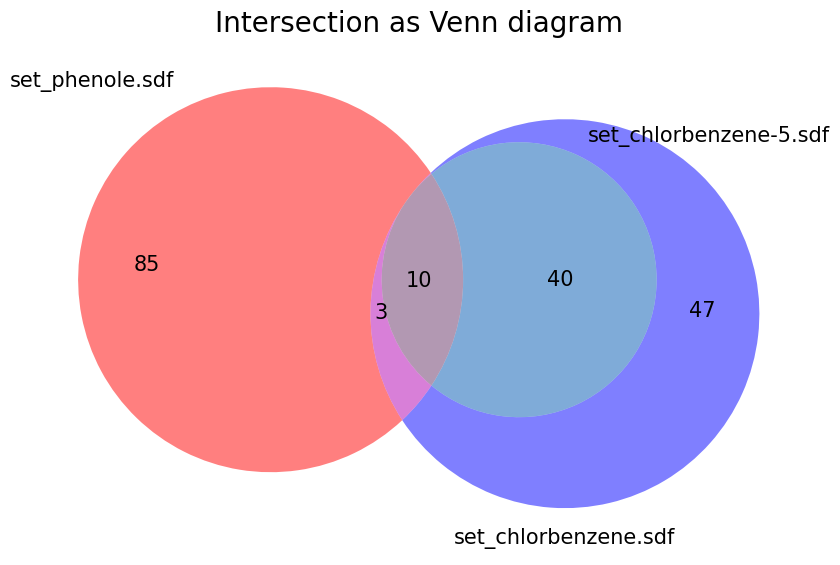

In [16]:
if len(testdict.keys()) == 4 or len(testdict.keys()) == 3:
    intersection = cider.visualize_intersection(testdict)
else:
    intersection = 'Does not exist!'
    print('This cell will fail if there are only one or more than three datasets for comparison!')

intersection

## Get Descriptor  
Besides the identity of the molecules, there are different descriptors to describe a molecule that can be compared. RDKit already has methods for calculating a lot of different descriptor values for molecules. After importing the RDKit methods, they can be called in CIDER and used to get the descriptor values for the molecules in the dataset.  
Other methods for calculating descriptor values might also work in CIDER after importing them, as long as they work on SDMolSupplier Objects.  
The name for the key under which the descriptor values are saved in the dictionary needs to be chosen.  
Following, there are examples of descriptors from RDKit run in the CIDER workflow.

In [17]:
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors

In [18]:
cider.get_descriptor_list_key(testdict, Descriptors.MolWt, 'Molecular Weight')

2023-06-19 10:53:13,160 [INFO] CIDER: Updated dictionary with 'Molecular Weight'


In [19]:
cider.get_descriptor_list_key(testdict, rdMolDescriptors.CalcMolFormula, 'Molecular Formula')

2023-06-19 10:53:13,349 [INFO] CIDER: Updated dictionary with 'Molecular Formula'


In [20]:
cider.get_descriptor_list_key(testdict, Descriptors.NumHDonors, 'Number of H-Donors')

2023-06-19 10:53:13,553 [INFO] CIDER: Updated dictionary with 'Number of H-Donors'


In [21]:
cider.get_descriptor_list_key(testdict, Descriptors.RingCount, 'Number of Rings')

2023-06-19 10:53:13,756 [INFO] CIDER: Updated dictionary with 'Number of Rings'


In the cell below there are some more examples for descriptors that could be calculated.

In [22]:
# cider.get_descriptor_list_key(testdict, Descriptors.NumHDonors, 'Number of H-Donors')
# cider.get_descriptor_list_key(testdict, Descriptors.RingCount, 'Number of Rings')
# cider.get_descriptor_list_key(testdict, Descriptors.NumHAcceptors, 'Number of H-Acceptors')
# cider.get_descriptor_list_key(testdict, Descriptors.Chi1, 'Chi Connectivity Indices')
# cider.get_descriptor_list_key(testdict, Descriptors.Kappa1, 'Kappa Shape Indices')

Taking a look at the sub-dictionary keys the calculated descriptor values can be found there as new keys.

In [23]:
print(testdict[first_subdict].keys())

dict_keys(['SDMolSupplier_Object', 'number_of_molecules', 'coconut_id', 'identifier_list', 'number_of_duplicates', 'duplicates_id', 'duplicates_index', 'number_of_shared_molecules', 'shared_molecules', 'Molecular Weight', 'Molecular Formula', 'Number of H-Donors', 'Number of Rings'])


## Get descriptor value with database ID  
Using the database ID from a molecule it is possible to search in the dataset for a descriptor value for this molecule. Not only the descriptor value will be returned but also the sub-dictionary where the molecule was found.

In [24]:
def get_value_from_id(
    all_dicts: dict, wanted_id: str, descriptor_list_keyname: str
):
    """
    This function returns a descriptor value for a specific molecule referred to by its database ID and
    the dataset where the molecule has been found.

    Args:
        all_dicts (dict): dictionary of dictionaries with database_id_keyname and descriptor_list_keyname
        wanted_id (str): Database ID for the molecule of interest.
        descriptor_list_keyname (str): Descriptor value of interest.

    Returns:
        Print: Descriptor value and dataset where the molecule is found.

    """
    for single_dict in all_dicts:
        if single_dict == cider.figure_dict_keyname:
                continue
        if wanted_id in all_dicts[single_dict][cider.database_id_keyname]:
            print("Molecule found in " + str(single_dict))
            index = all_dicts[single_dict][cider.database_id_keyname].index(
                wanted_id
            )
            descriptor_value = all_dicts[single_dict][descriptor_list_keyname][
                index
            ]
            print(
                str(descriptor_list_keyname)
                + " value for ID "
                + str(wanted_id)
                + ": "
                + str(descriptor_value)
            )
        else:
            print("Molecule not found in " + str(single_dict))
    return

In [25]:
get_value_from_id(testdict, 'CNP0291002', 'Molecular Weight')

Molecule found in set_phenole.sdf
Molecular Weight value for ID CNP0291002: 173.55499999999998
Molecule found in set_chlorbenzene-5.sdf
Molecular Weight value for ID CNP0291002: 173.55499999999998
Molecule found in set_chlorbenzene.sdf
Molecular Weight value for ID CNP0291002: 173.55499999999998


## Descriptor binning and visualization  
As long as the descriptor values are integers or float numbers, the values can be plotted for a visual comparison. Descriptor values like the molecular formula can not be plotted.  
For continuous values such as the molecular weight, the interval size for the binning of the descriptor values can be chosen. If there is an interval size (width_of_bins) given for a discrete descriptor, it will be ignored. 
The values used for plotting (intervals and number of molecules from each dataset per interval) will usually be exported into the output folder as csv files. This can be suppressed by changing 'save_dataframe' to False.  
Please note that only descriptors can be plotted that have been calculated before.  
When working with very large datasets leading to a high number of intervals it should be considered to change the image size to get a stretched x axis better displaying the distribution. This can be done using the 'figsize=(high, width)' parameter.

2023-06-19 10:53:16,813 [INFO] CIDER: Updated the dictionary with 'binned_Molecular Weight'
2023-06-19 10:53:17,368 [INFO] CIDER: Updated dictionary with 'distribution_of_Molecular Weight'


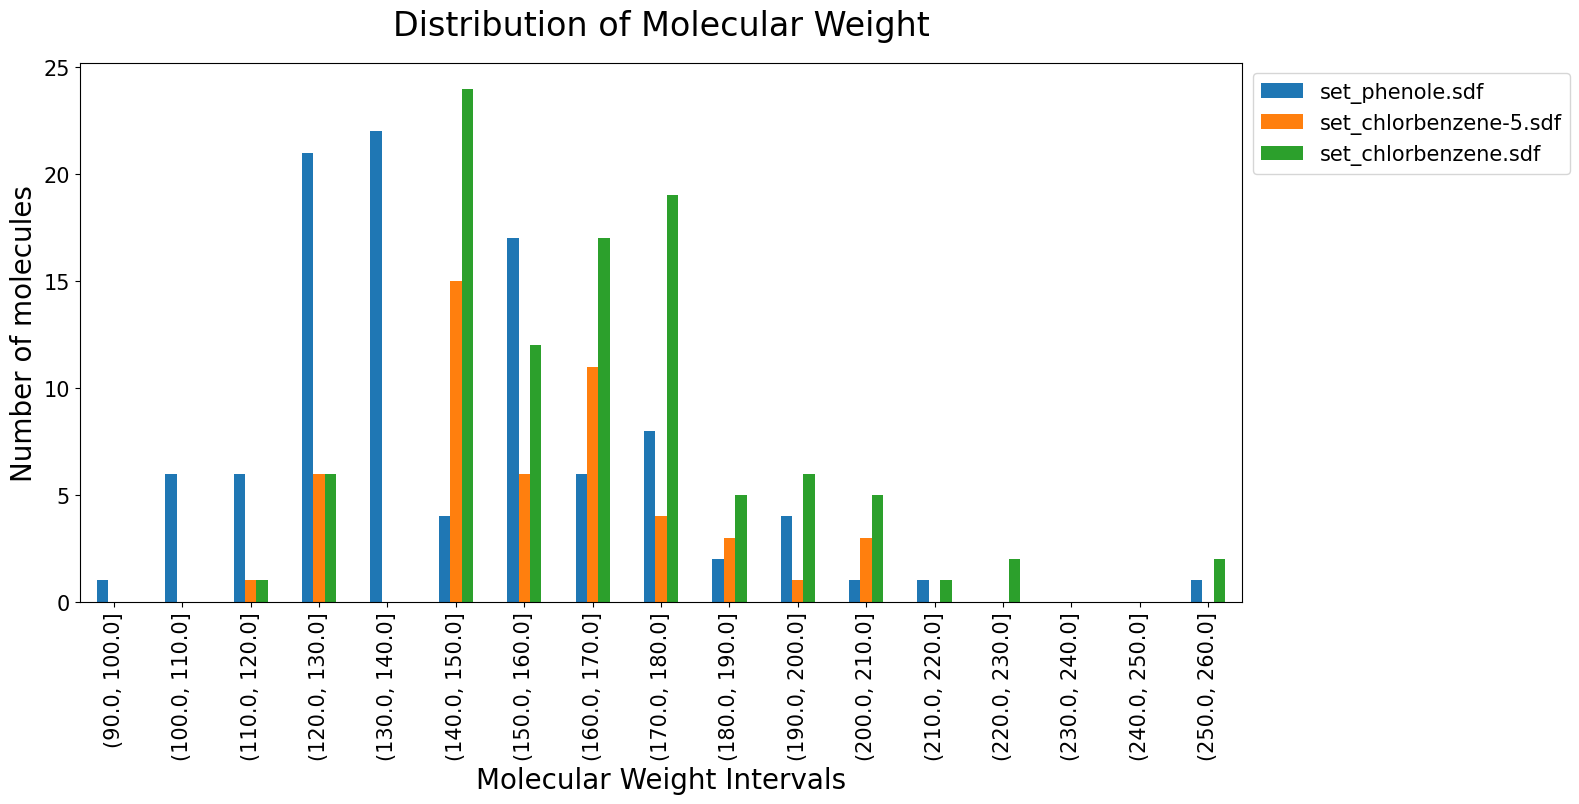

In [26]:
cider.descriptor_counts_and_plot(testdict, 'Molecular Weight', width_of_bins = 10)

The number of rings is a discrete descriptor and a given interval size will be ignored. The plotting values will not be exported due to the parameter 'save_dataframe=False'.

2023-06-19 10:53:17,836 [INFO] CIDER: Updated the dictionary with 'binned_Number of Rings'
2023-06-19 10:53:18,012 [INFO] CIDER: Updated dictionary with 'distribution_of_Number of Rings'


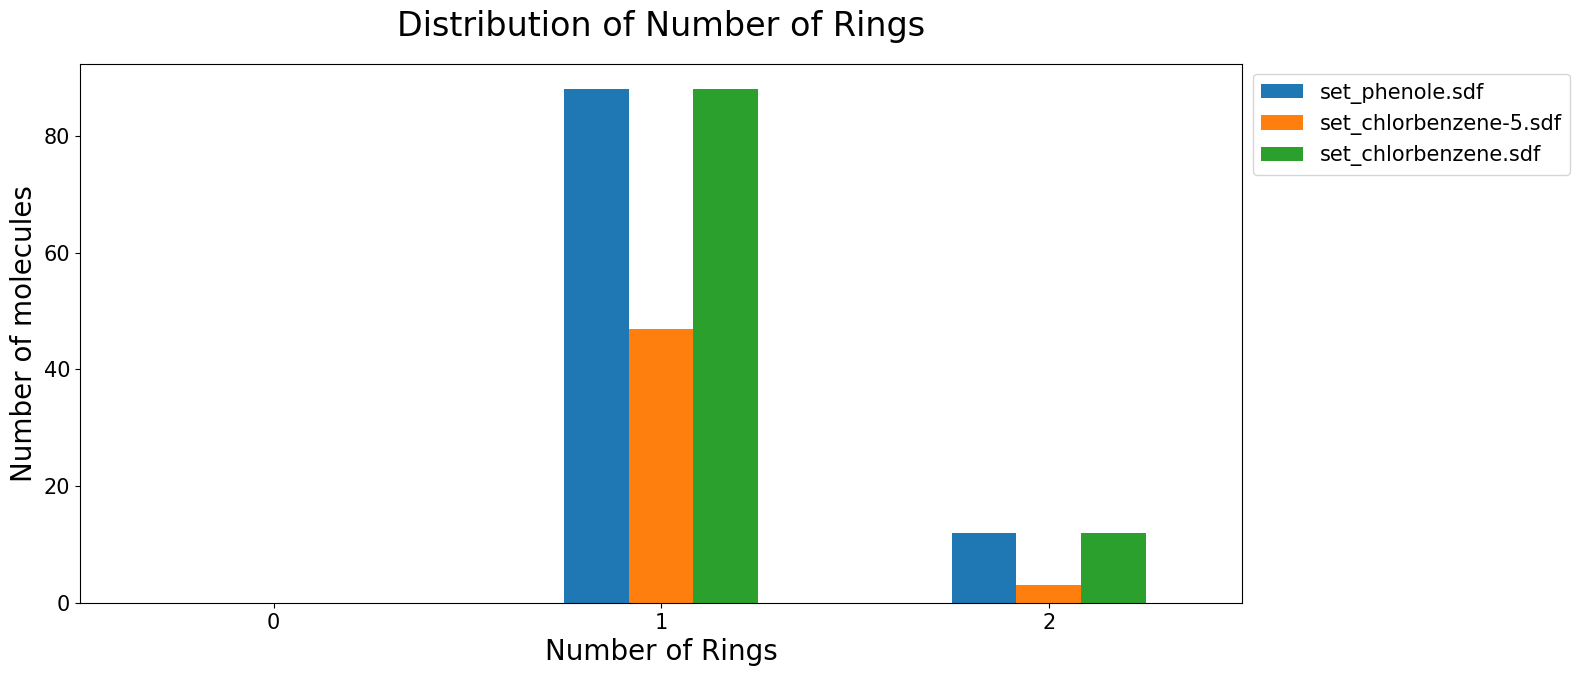

In [27]:
cider.descriptor_counts_and_plot(testdict, 'Number of Rings', width_of_bins = 10, save_dataframe=False)

## Lipinski Rules of 5 with visualization  
The Lipinski Rules of 5 include more than one descriptor. CIDER can check all the single descriptors of the Lipinski Rules and get the number of broken rules for every molecule. There will also be a summary for every dataset, how the molecules are distributed.

In [28]:
cider.get_lipinski_key(testdict)

2023-06-19 10:53:18,718 [INFO] CIDER: Updated dictionary with 'number_of_broken_Lipinski_Rules' and 'Lipinski_Rule_of_5_summary'


The distribution of the molecules in the datasets for the Lipinski Rules can be plotted comparable to the descriptor plots.  
Here all the molecules are relatively small and do not break any Lipinski rule.

2023-06-19 10:53:19,425 [INFO] CIDER: Updated dictionary with 'lipinski_plot'


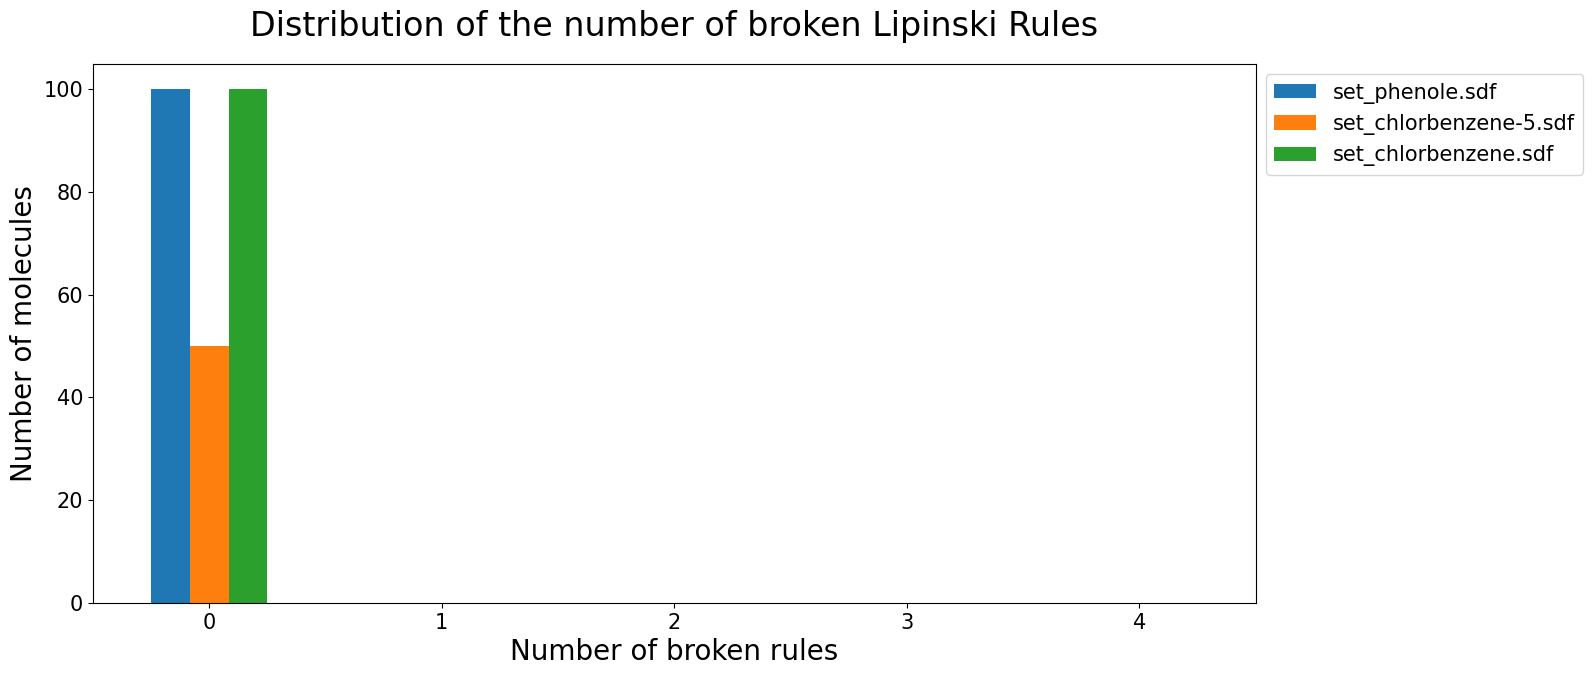

In [29]:
cider.lipinski_plot(testdict)

## Scaffold analysis  
CIDER can get the scaffold (all rings, linkers and terminal atoms with a double bound), the framework (only rings and linkers) or the graph framework (all atoms and bonds replaced with carbon and single bonds) for every molecule. The absolute or relative frequency of the different scaffolds, frameworks or graph framework is calculated for every dataset and summarized. A chosen number of the most frequent scaffolds, frameworks or graph framework is plotted.  
The default is to use scaffolds.

2023-06-19 10:53:20,295 [INFO] CIDER: Updated dictionary with 'scaffold_list' and 'scaffold_summary'
2023-06-19 10:53:20,761 [INFO] CIDER: Updated dictionary with 'scaffold_grid'


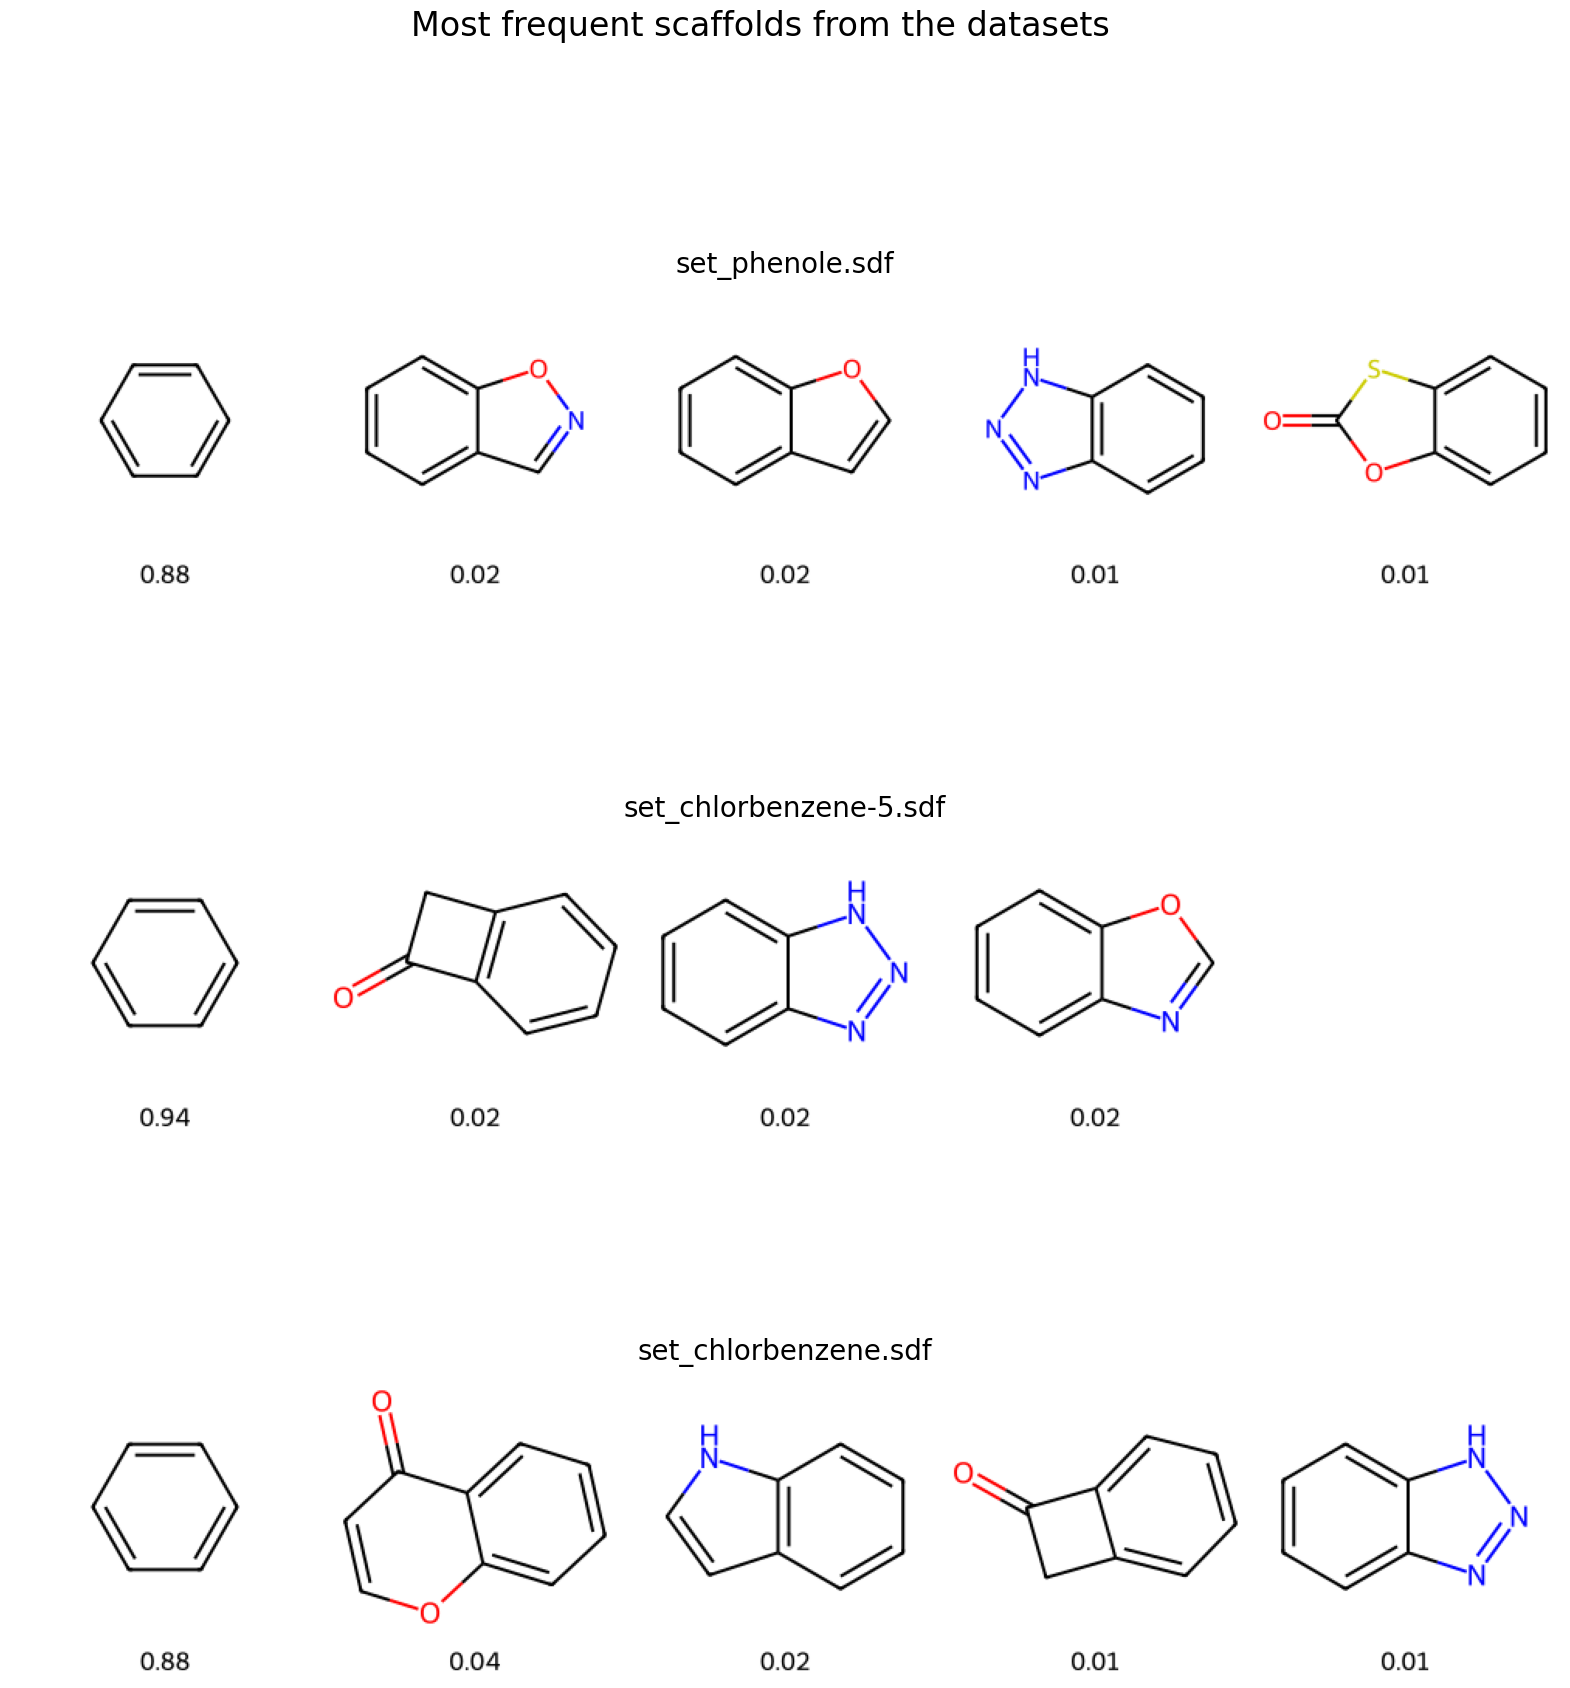

In [30]:
cider.draw_most_frequent_scaffolds(testdict)

Under the key 'scaffold_list' the scaffold (framework, graph framework) for every molecules is listed as SMILES string. And the 'scaffold_summary' contains the (relative or absolute) frequency for the scaffolds (frameworks, graph frameworks) in the single datasets.  
When setting the parameter 'normalize=False' the absolute frequency for the scaffolds (frameworks, graph frameworks) is used. 

2023-06-19 10:53:21,443 [INFO] CIDER: Updated dictionary with 'scaffold_list' and 'scaffold_summary'
2023-06-19 10:53:21,897 [INFO] CIDER: Updated dictionary with 'scaffold_grid_1'


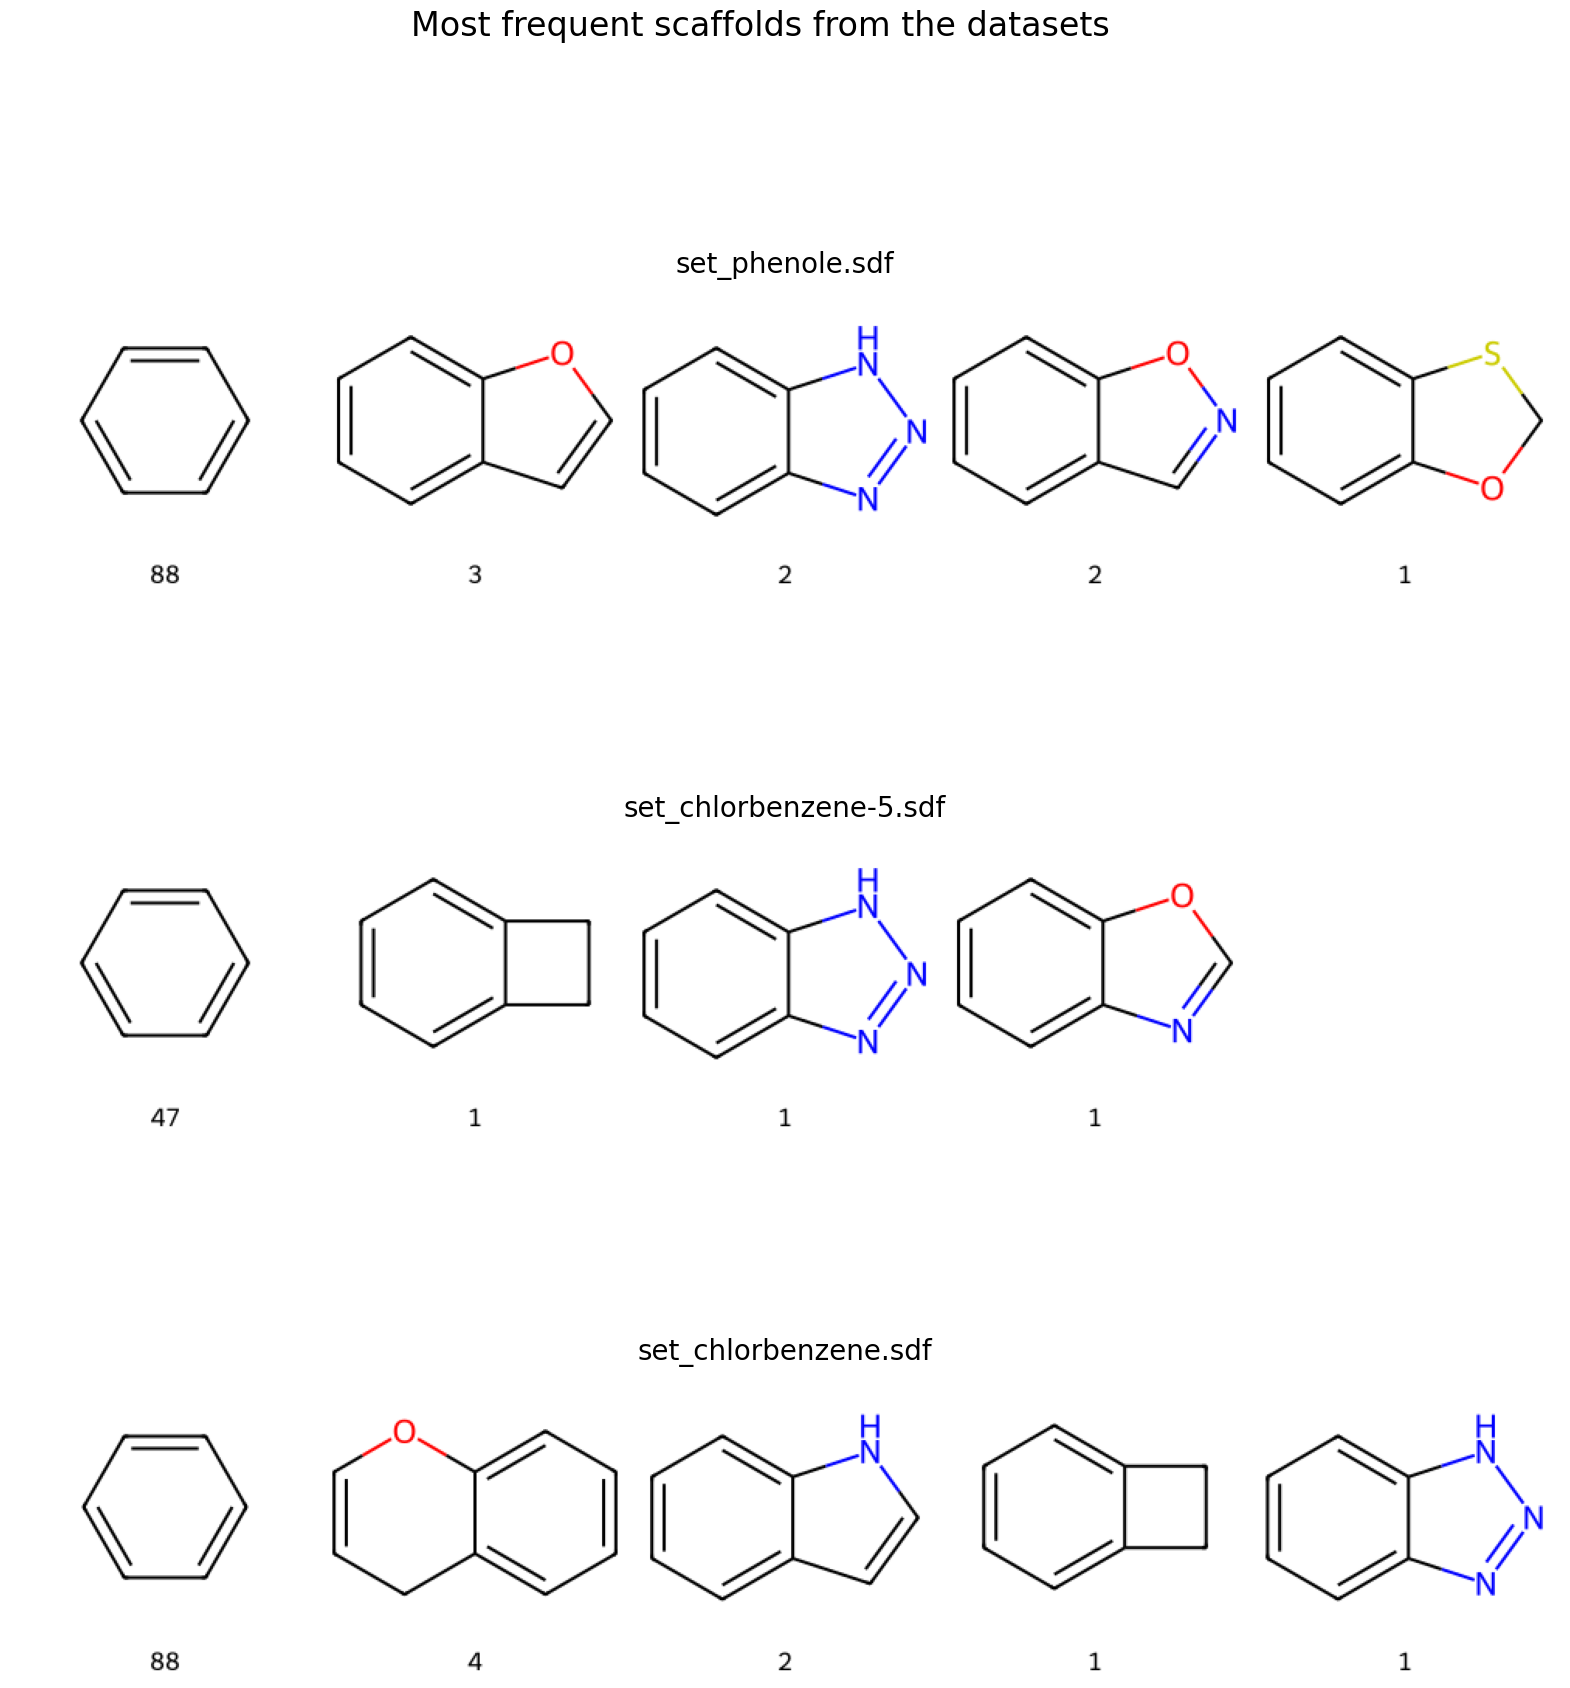

In [31]:
cider.draw_most_frequent_scaffolds(testdict, framework=True, normalize=False)

Similar to the cider.draw_molecules method the number of shown scaffolds (frameworks, graph framework) can be chosen as well as the number of images per row. When there are less scaffolds (frameworks, graph frameworks) in the dataset than the chosen number, the highest possible number of scaffolds (frameworks, graph frameworks) will be used.

2023-06-19 10:53:22,414 [INFO] CIDER: Updated dictionary with 'scaffold_list' and 'scaffold_summary'
2023-06-19 10:53:22,924 [INFO] CIDER: Updated dictionary with 'scaffold_grid_2'


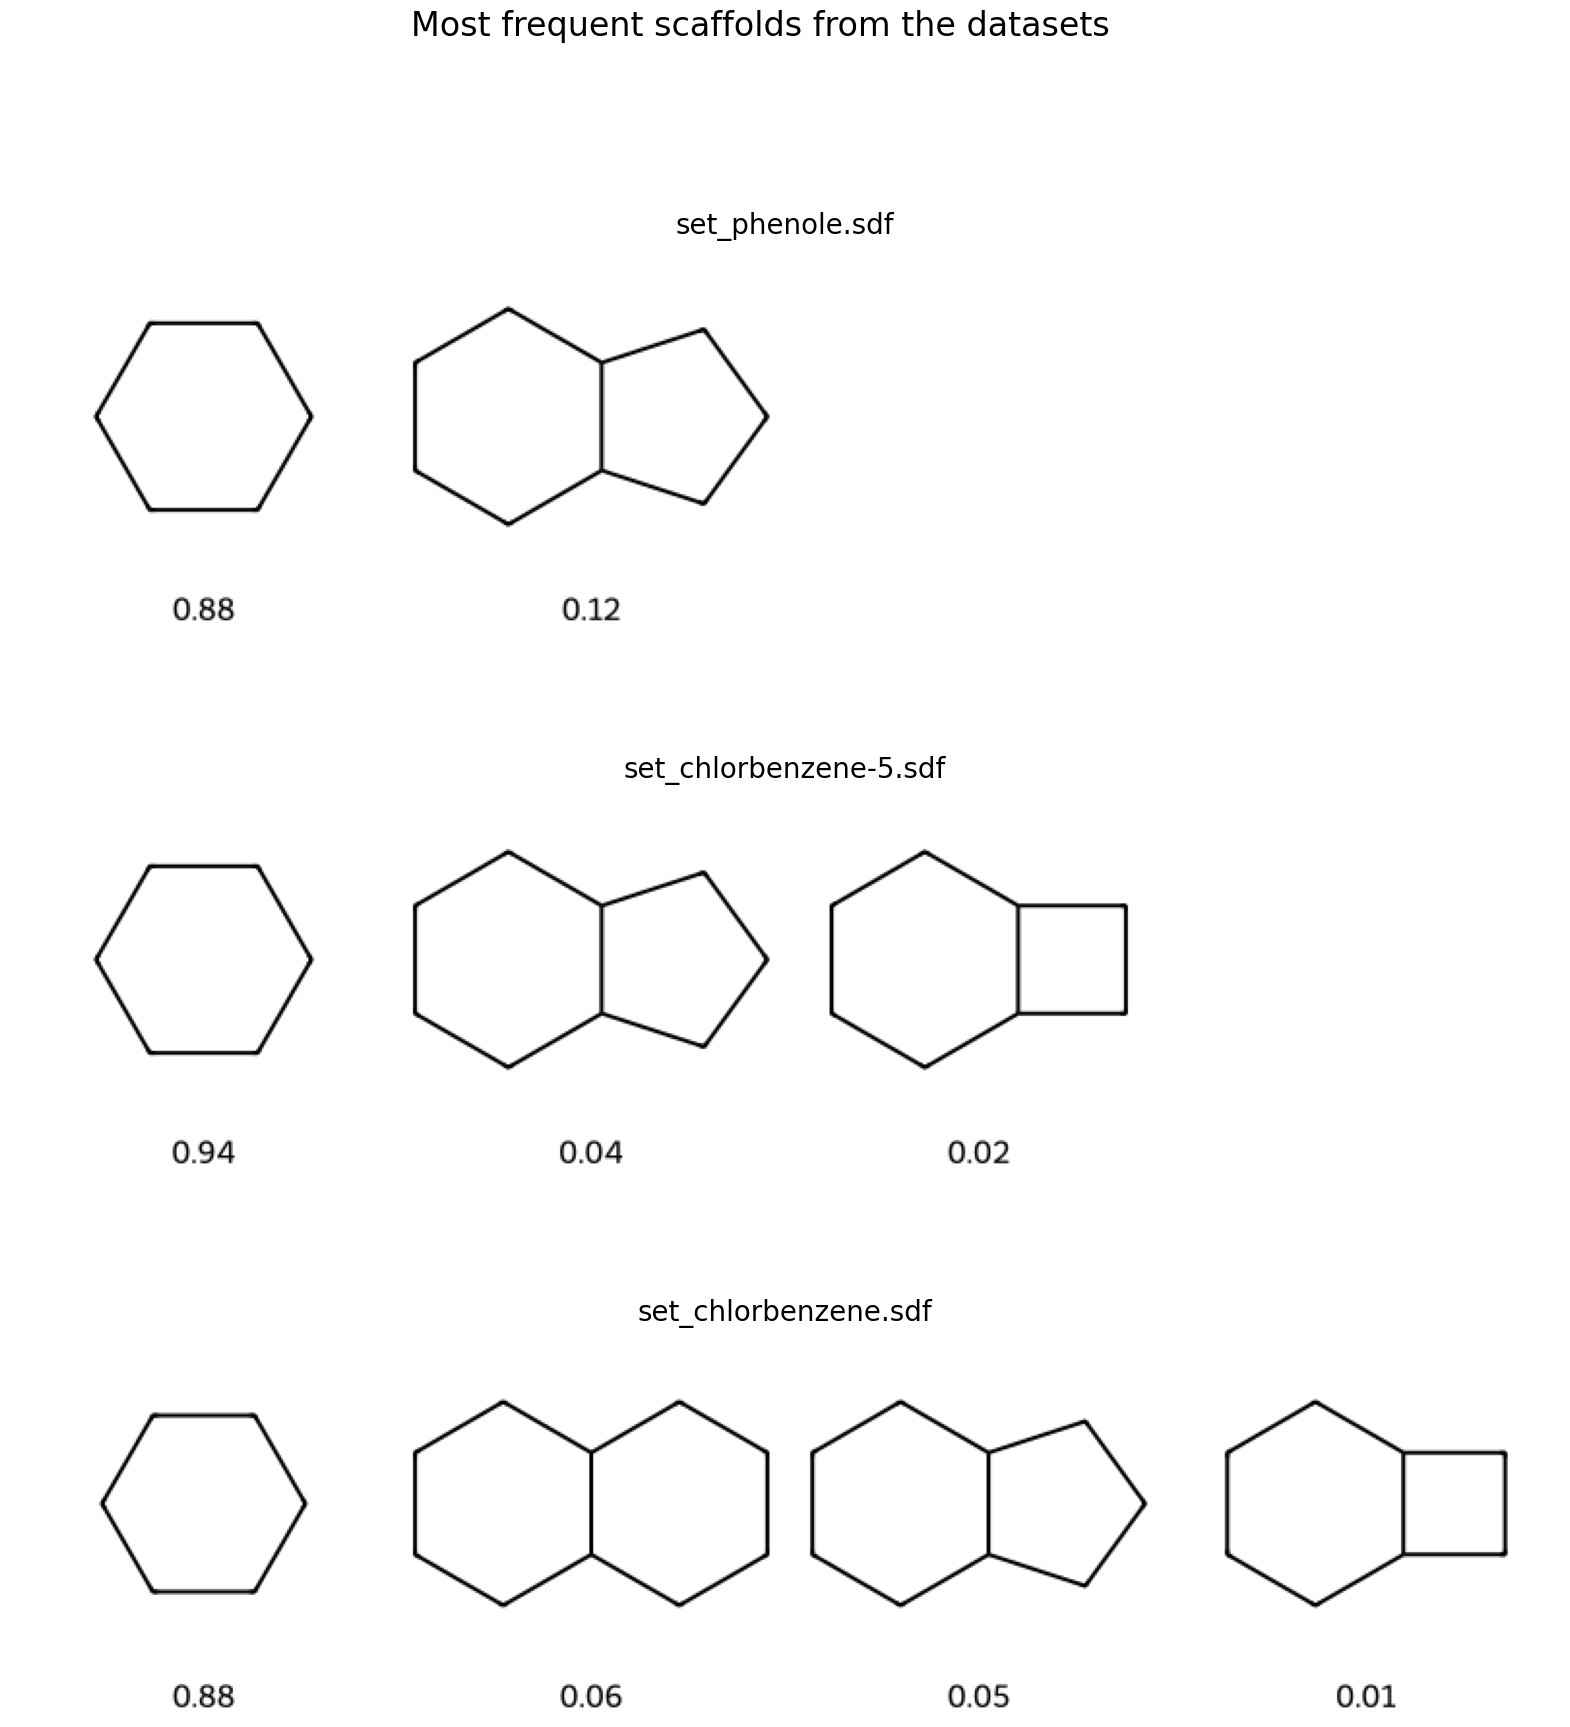

In [32]:
cider.draw_most_frequent_scaffolds(testdict, graph_framework=True, number_of_structures=8, structures_per_row=4)

## Chemical Space Visualization  
Using ChemPlot the chemical space of the molecules can be visualized. Therefore, a chemical identifier is needed, but it does not matter if it is SMILES, InChI or InChIKey. ChemPlot will generate a fingerprint with a given fingerprint size (fp_bits) and radius (fp_radius). For the visualization the dimension of the chemical space needs to be reduced to two dimensions utilizing PCA, t-NSE or UMAP. Additionally, an interactive plot can be generated (will be opened in a new window).  
Please remember that t-SNE and UMAP are probabilistic technique so they might give slightly different results every time they are run.  
The default parameters are fingerprints with 2048 bits and a radius of 2, dimension reduction as PCA and interactive as True.  

In [33]:
cider.chemical_space_visualization(testdict)

Figure(id='1002', ...)

The interactive plot will not be displayed in line but is opened in a new window. There it can be saved. 
Please note that to dots from the chlorbenzene-5 set (blue dots in the interactive) are superimposed with the dots from the chlorbenzene set (green dots in the interactive plot) as both of the sets contain the same molecules. Therefore the blue dots are not visible. In the interactive plot this can be noted when pointing on the dots but for the 'normal' plots this should be kept in mind.
Changing the dimension reductions shows the difference between the different methods.

2023-06-19 10:53:26,296 [INFO] CIDER: Updated dictionary with 'chemical_space'


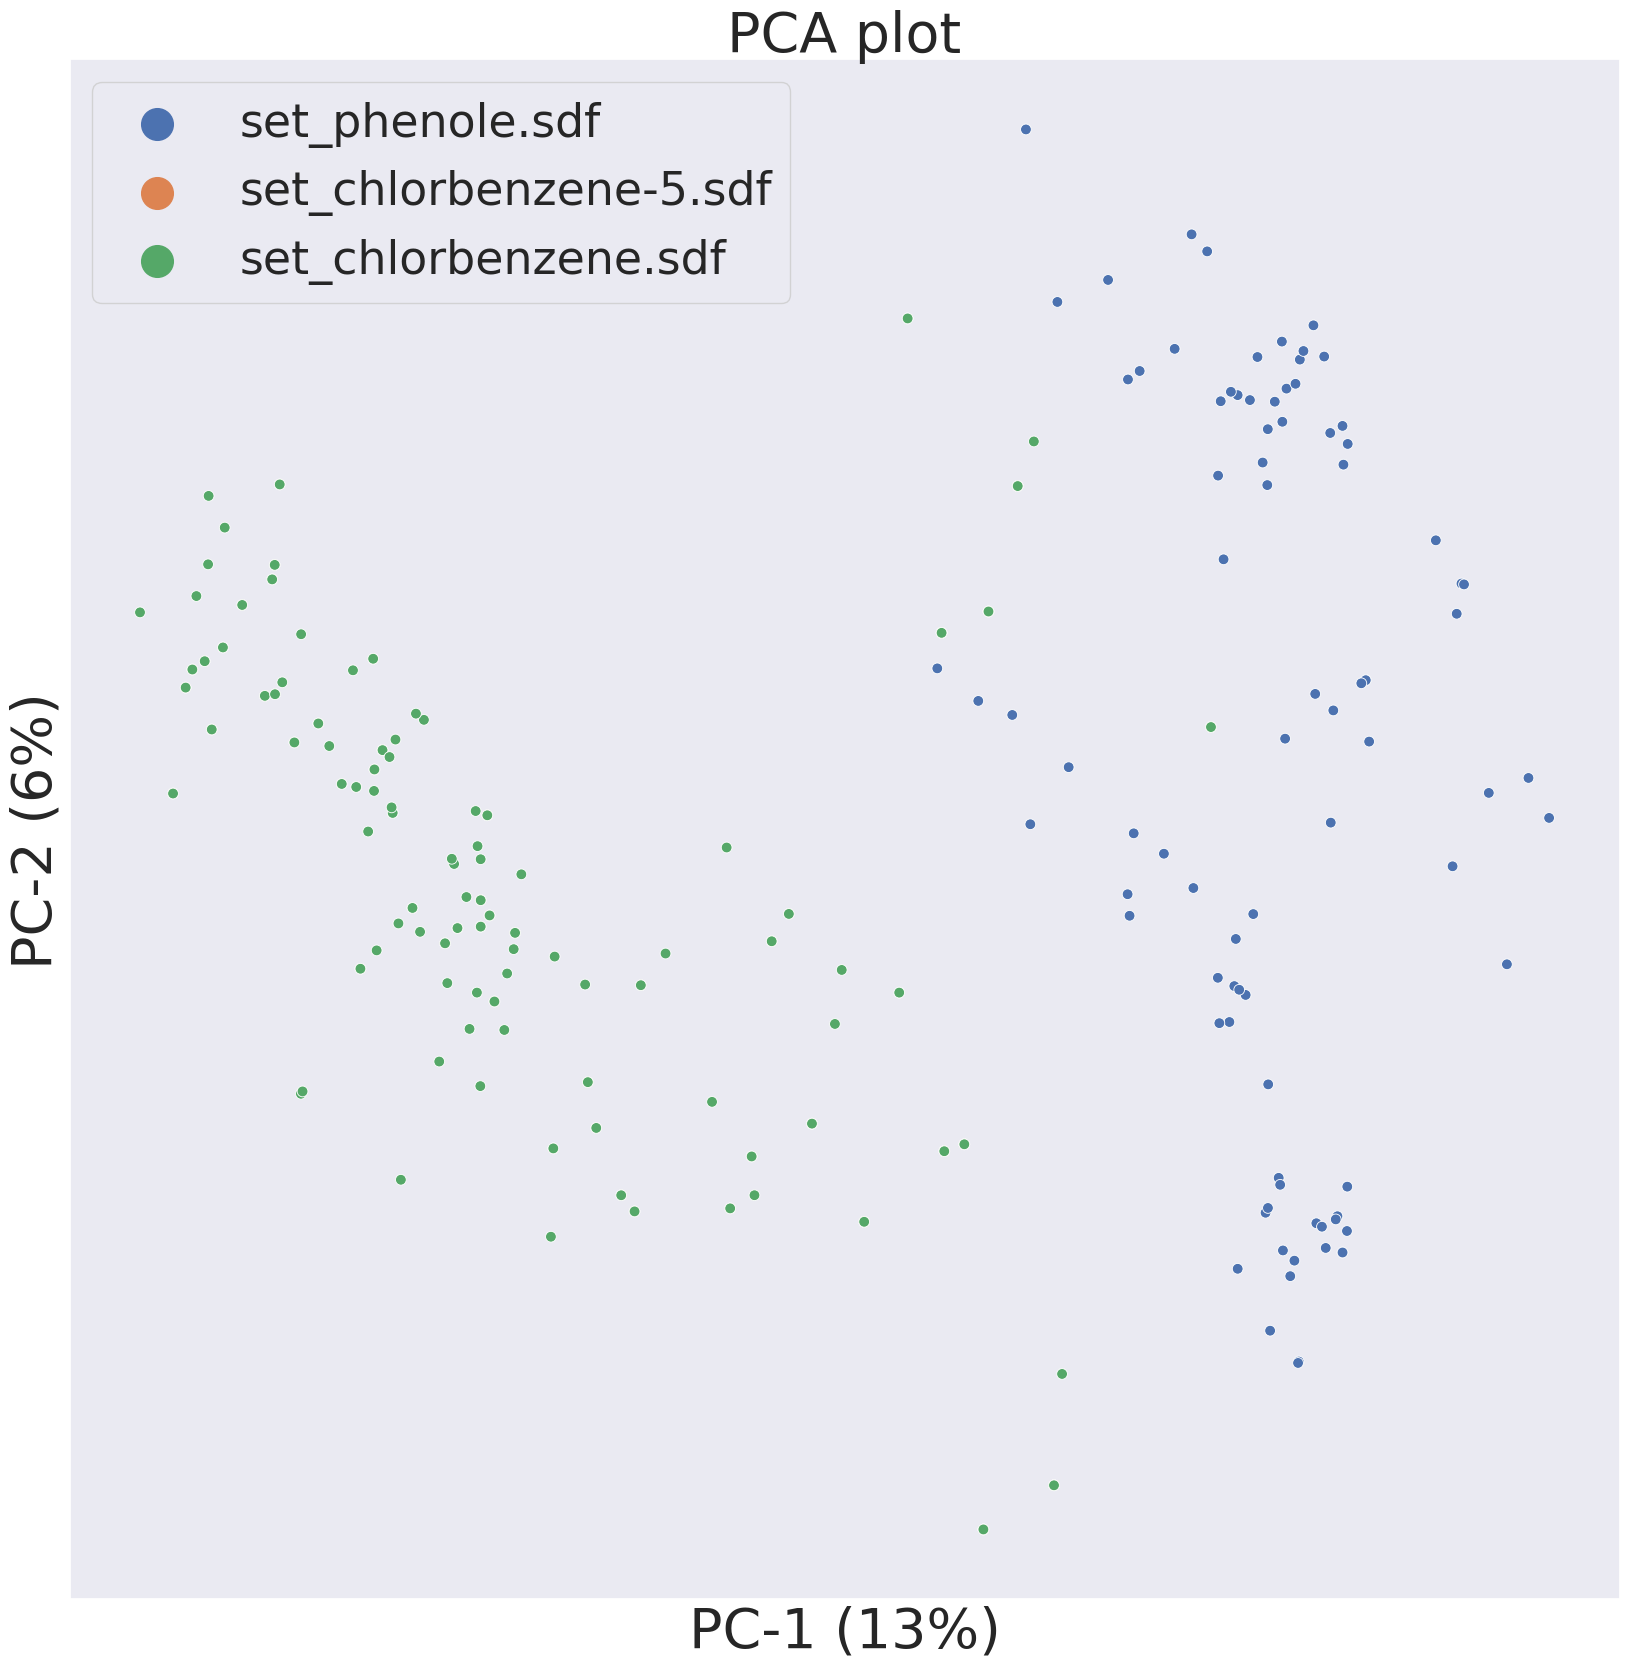

In [34]:
cider.chemical_space_visualization(testdict, dimension_reduction = 'pca', interactive = False, fp_bits = 1024, fp_radius = 2)

2023-06-19 10:53:33,125 [INFO] CIDER: Updated dictionary with 'chemical_space_1'


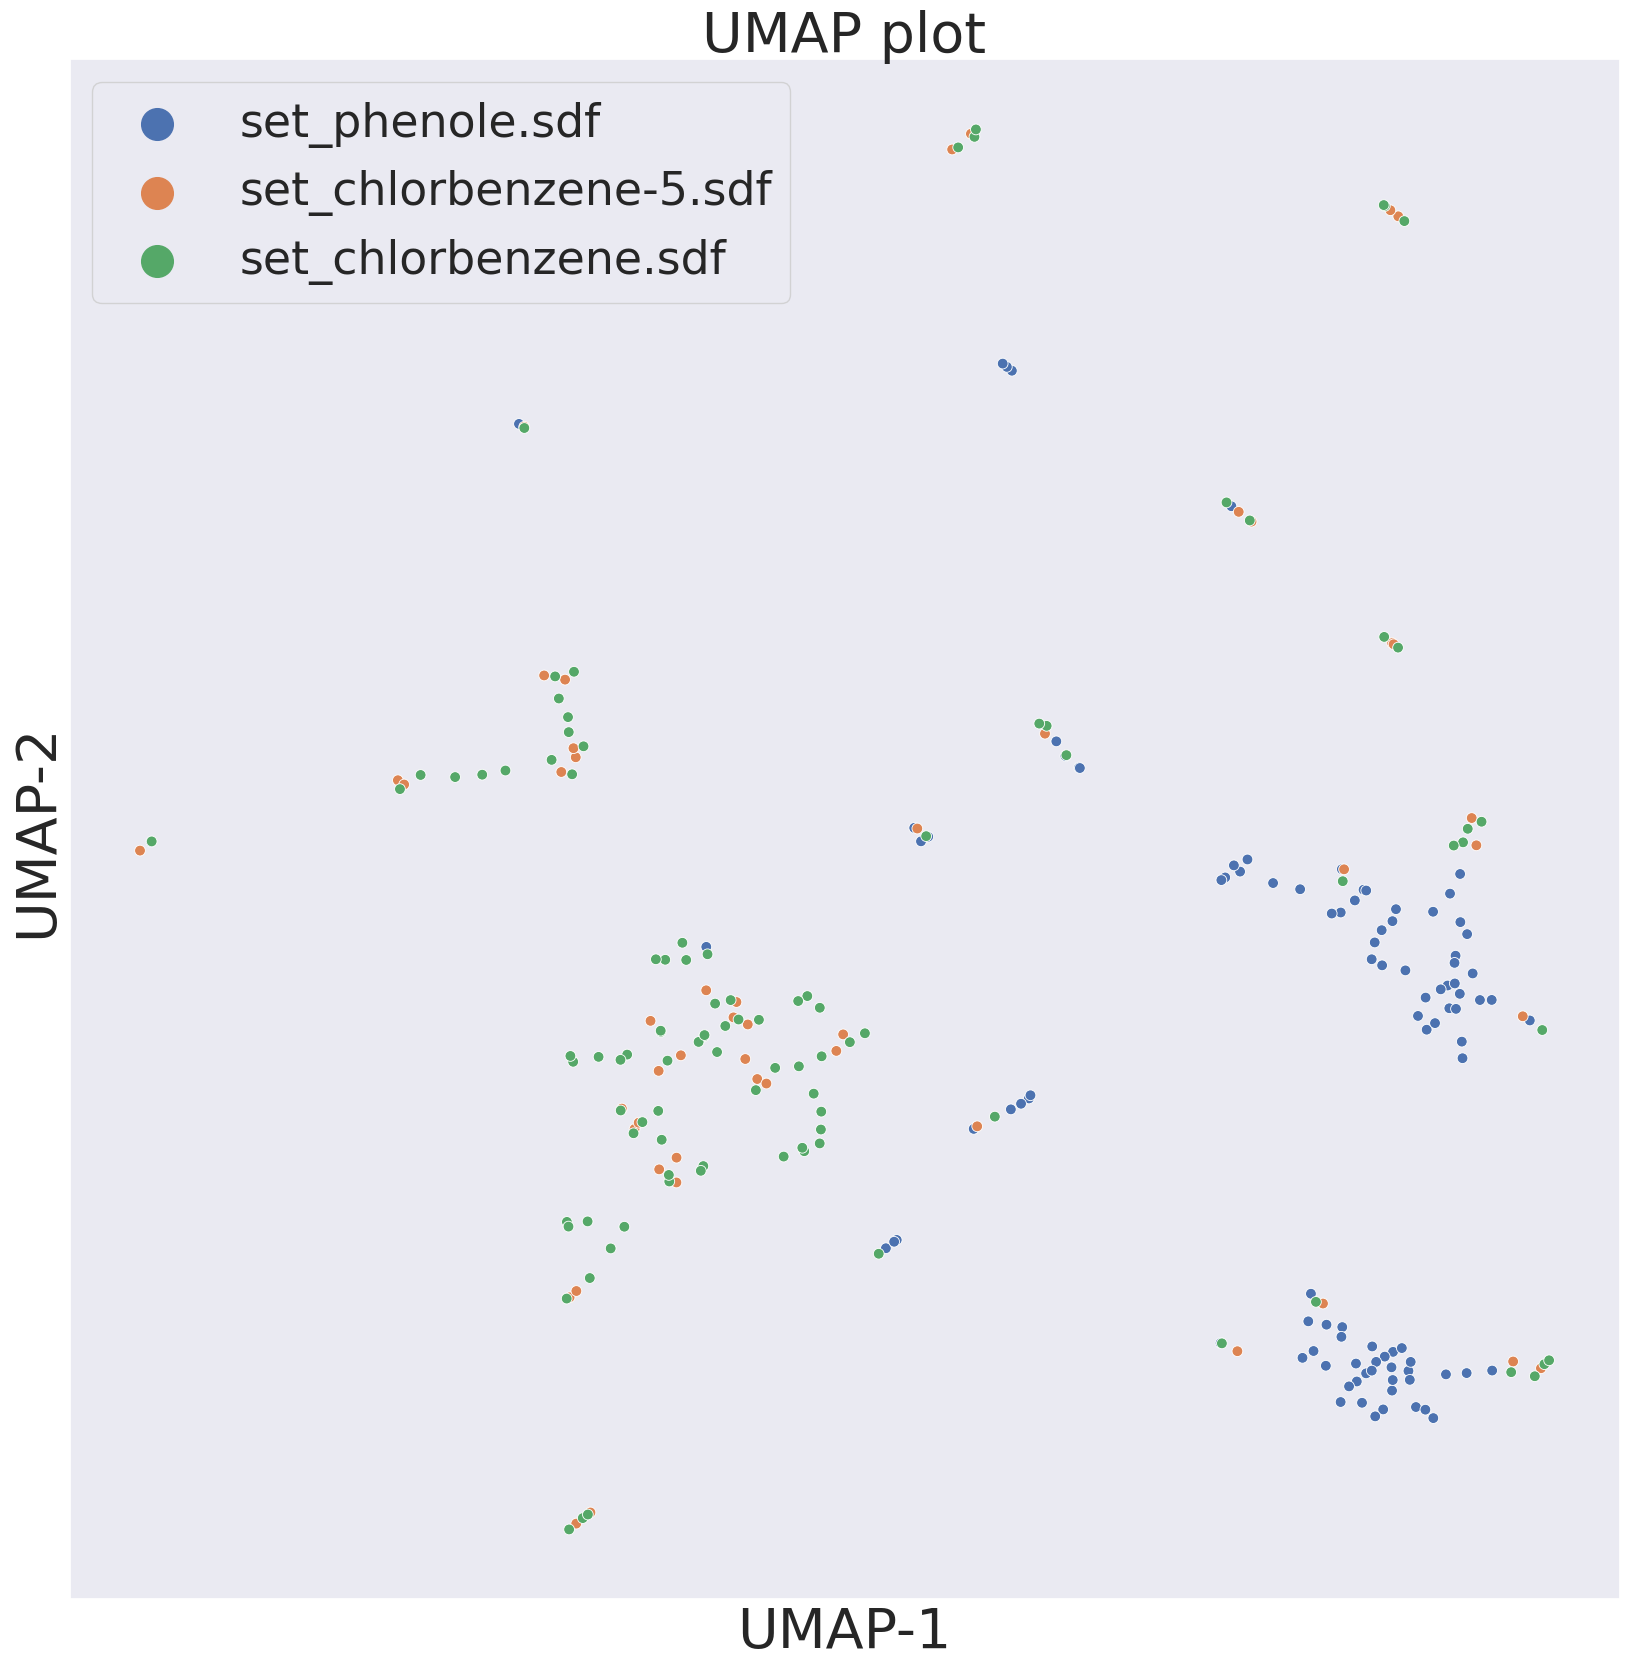

In [35]:
cider.chemical_space_visualization(testdict, dimension_reduction = 'umap', interactive = False, fp_bits = 1024, fp_radius = 2)

2023-06-19 10:53:34,578 [INFO] CIDER: Updated dictionary with 'chemical_space_2'


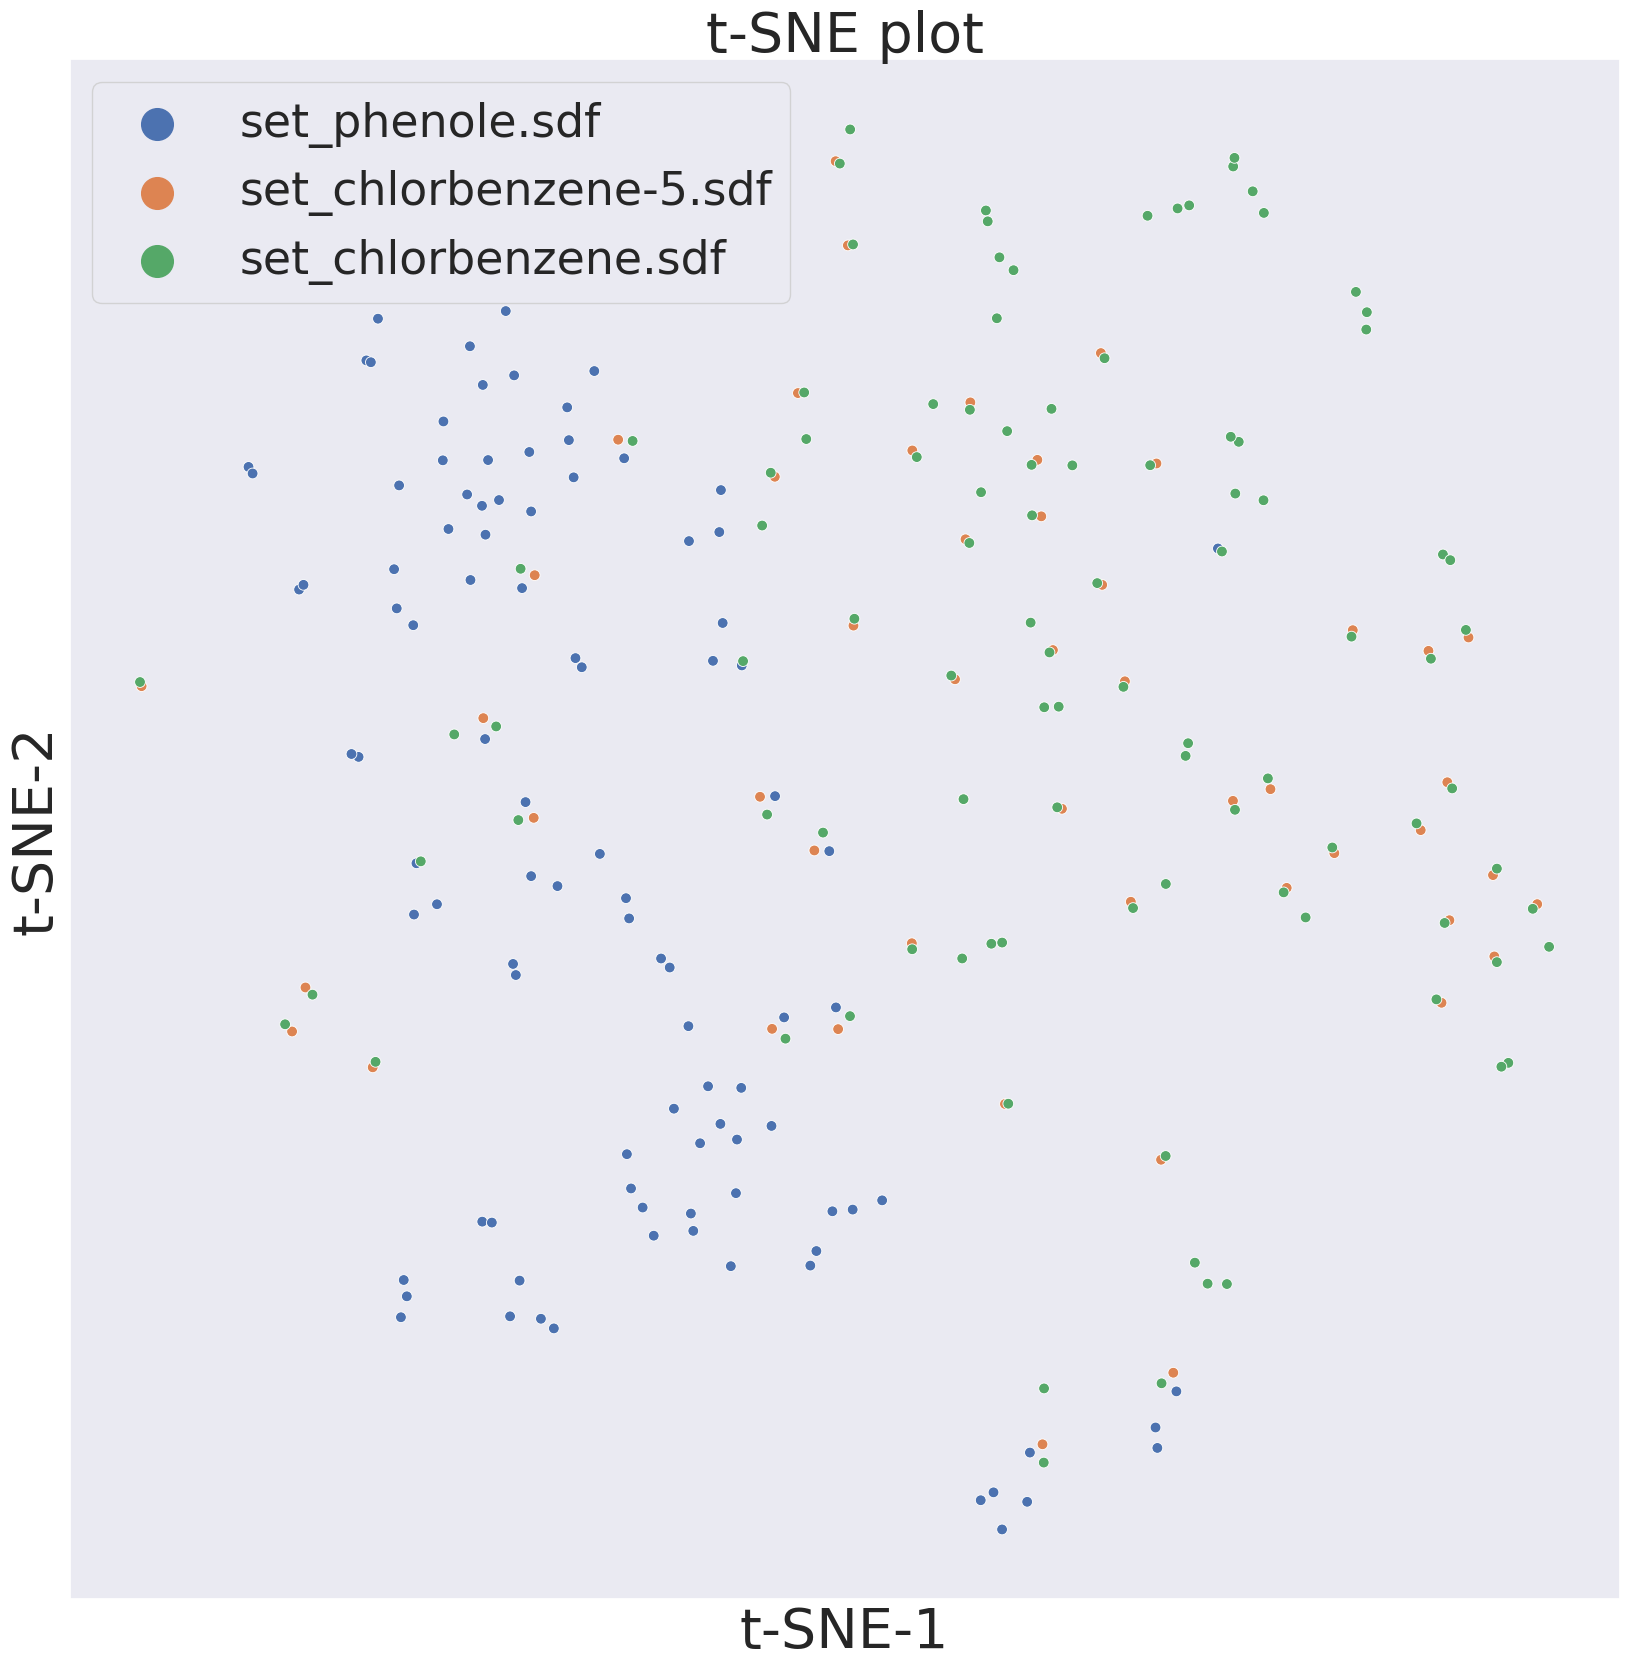

In [36]:
cider.chemical_space_visualization(testdict, dimension_reduction = 'tsne', interactive = False, fp_bits = 1024, fp_radius = 2)

## Export  
All the calculated descriptor values can be exported into csv files for the respective dataset. 

In [37]:
cider.export_single_dict_values(testdict)  

2023-06-19 10:53:34,766 [INFO] CIDER: set_phenole.sdf: 0 exported descriptor values
2023-06-19 10:53:34,768 [INFO] CIDER: set_chlorbenzene-5.sdf: 0 exported descriptor values
2023-06-19 10:53:34,770 [INFO] CIDER: set_chlorbenzene.sdf: 0 exported descriptor values


All the created images can be saved into one pdf.

In [38]:
cider.export_figure_report(testdict)

2023-06-19 10:53:44,382 [INFO] CIDER: 'cider_report.pdf' exported
